# Course: MIS 6/74061 – Advanced Machine Learning
# Assignment: 1. Neural Network model (IMDB dataset)
## Miri Chung, ID: 811176241
## Date: October 02, 2022

### The purpose of this assignment is to learn about Neural Network model by modifying various model specifications. Below, I describe how different approaches affect the model performance and explain why. Following Dr. Shanker's advice, the optimizer was modified from "rmsprop" to "Adam". In order to create a reproducible process and to be able to compare the results of each model, the seed number, "1" is used throughout the assignment. 


# <The detailed coding and results of each model>

## <ins>0. Performance of the original model (The performance of the original model is described here to serve as a basis for evaluating future modified models)<ins>
### The optimized epoch for the original model is 4, i,e., at the fourth epoch, the validation loss is the smallest. At the fourth epoch, the original model achieves the accuracy of 0.8835 and loss of 0.2907. According to the confusion matrix, the precision is 0.8954, recall is 0.8553, and F1 score is 0.8749.

## <ins>1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.<ins>
### It is expected that the more hidden layers, the better because adding more layers allows the model to construct features in a hierarchical way. Hence, accuracy will increase with more hidden layers. 
### As expected, Compared to the one-layered model, the two-layered model had higher accuracy; The model with one representation layer achieves the accuracy of 0.8799, which is 0.0036 less than the accuracy of the original model. Also, The loss of the original model was about 0.012 less than that of the one-layered model. 
### However, contrary to expectations, the model with three layers did not produce better accuracy than the original model. The model with three hidden layers achieves the accuracy of 0.8796, which is 0.0039 less than the accuracy of the original model. The reasons for this result may be as follows; a single-layer neural network can be effectively used to represent linearly separable functions. This means simple problems, such as the current IMBD case where two classes (i.e., positive and negative) in classification are considered, can be neatly separated by a line. In this case, a multilayer perceptron neural network for the predictive modeling problem would not be appropriate.

## <ins>2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.<ins>
### As expected, the smaller model (8 units) starts overfitting later than the original model (after six epochs rather than three), and its performance degrades more slowly once it starts overfitting. Likewise, the bigger model (32 units) starts overfitting earlier than the original model, almost immediately, (after two epochs rather than three). These results show that the more units (i.e. capacity) the model has, the more quickly it can model the training data (resulting in a low training loss), but the more susceptible it is to overfitting. 
### However, it is also expected that more units allow the model to learn more-complex representations. This expected pattern was confirmed by comparing the accuracy and loss of models using 8, 16, and 32 units.
### The more units the model uses, the less the loss (8 units: 0.3183 vs. 16 units: 0.2917 vs. 32 units: 0.2893) and the higher the accuracy (8 units: 0.8791 vs. 16 units: 0.8835 vs. 32 units: 0.8843).
### Interestingly, however, the performance started to deteriorate when the model increased the unit to 64. Compared to 32 units, the loss increased (32 units: 0.2893 vs 64 units: 0.3078) and the accuracy decreased (32 units: 0.8843 vs. 0.8792). This is possible because a large number of units may lead to learning unwanted patterns, which will improve performance on the training data but not on the test data.
### 

## <ins>3. Try using the mse loss function instead of binary_crossentropy.<ins>
### Binary crossed entropy is for single output networks, while mean squared error is one of the best choices for regression. Because the IMDB problem is for a binary classification problem (i.e., positive or negative) and the output of the model is a probability (i.e. sigmoid activation), it is recommended to use the binary_crossentropy loss function and MSE will be badly defined.
### As expected, the accuracy of the original model used binary_crossentropy loss function is 0.8835, whereas the accuracy of the model used MSE loss function is 0.8804, which is 0.0031 less than the original model. 

## <ins>4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.<ins>
### Both ReLU and TanH loss functions can be used for classification between two classes. TanH activation function is very similar to the sigmoid, but the difference is that it’s squashing to the range [-1,1].
### ReLu is considered as the best and most advanced activation function right now compared to the sigmoid and TanH. ReLu is computationally very efficient as it takes an elementwise operation on the input, and if the input is negative it’s going to put it to zero, and then if it’s positive, it’s going to be just passed through. 
### ReLu is also considered more advanced compare to other activation function such as TanH since ReLu function does not have the vanishing gradient problem. If there are more layers in the network, the product value of the derivative decreases until the partial derivative of the loss function approaches zero and the partial derivative disappears. Gradient loss is a specific problem with recurrent neural networks. This is because network updates involve unrolling the network for each input time step, resulting in very deep networks requiring weight updates.
### As expected, the loss of the original model with ReLu has a smaller loss (ReLu : 0.2917 vs. TanH: 0.0885) and better accuracy on the test sets (ReLu : 0. 0.8835 vs. TanH: 0.8804). 

## <ins>5. Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.<ins>
### Regularization techniques are a set of best practices that actively impede the model’s ability to fit perfectly to the training data, with the goal of making the model perform better during validation. There are two regularization techniques (L1 and L2). 

### Both models with L1 and L2 started to overfit at more epochs (6 epochs and 14 epochs, respectively) than the original model, meaning that the models with L1 and L2 regularization are much more resistant to overfitting than the original model. 
### Interestingly, contrary to expectations, when L1 was applied (Model 5-1), the accuracy of the validation set (0.8845) did not increase compared to the original model (0.8892). The accuracy of the test set (0.8820) was also lower than that of the original model (0.8835). 
### The same was true when L1 was applied (Model 5-3). The accuracy of the validation set (0.8771) did not increase compared to the original model (0.8892). The accuracy of the test set (0.8795) was also lower than that of the original model (0.8835).

### Another method used to increase performance is Dropout. Dropout is one of the most effective and commonly used regularization techniques for neural networks. The use of Dropout clearly improves the validation over the original model (the accuracy of 0.8874, which is 0.0015 more than the accuracy of the base model. —it also seems to work much better than L2 regularization, since the lowest validation loss (0.2757) reached has improved. The accuracy of the test set was also the highest (0.8874)

# Original Model (Hidden layers:2, Units:16, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 4)

In [121]:
from keras.datasets import imdb
from keras.utils import set_random_seed
set_random_seed(1)

In [122]:
from tensorflow.keras.datasets import imdb

In [123]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data (num_words = 10000)

In [124]:
train_data [0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [125]:
train_labels[0]

1

In [126]:
max ([max(sequence) for sequence in train_data])

9999

In [127]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (value, key) in word_index.items()])
decoded_review = "".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data [0]]
)

In [128]:
import numpy as np

In [129]:
def vectorize_sequences (sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate (sequences):
        for j in sequence:
            results [i, j] = 1.
    return results
        

In [130]:
x_train = vectorize_sequences (train_data)

In [131]:
x_test = vectorize_sequences (test_data)

In [132]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [133]:
x_train[100]

array([0., 1., 1., ..., 0., 0., 0.])

In [134]:
y_train=np.asarray(train_labels).astype("float32")

In [135]:
y_test=np.asarray(test_labels).astype("float32")

In [136]:
from tensorflow import keras

In [137]:
from tensorflow.keras import layers

In [138]:
set_random_seed(1)

model = keras.Sequential ([
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

In [139]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [140]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [141]:
history = model.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.5764 - accuracy: 0.7301 - val_loss: 0.4395 - val_accuracy: 0.8501
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3297 - accuracy: 0.9005 - val_loss: 0.3101 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2166 - accuracy: 0.9321 - val_loss: 0.2796 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1557 - accuracy: 0.9528 - val_loss: 0.2835 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1193 - accuracy: 0.9655 - val_loss: 0.2981 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0908 - accuracy: 0.9759 - val_loss: 0.3149 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0689 - accuracy: 0.9851 - val_loss: 0.3414 - val_accuracy: 0.8773
Epoch 8/20
30

In [142]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [143]:
import matplotlib.pyplot as plt

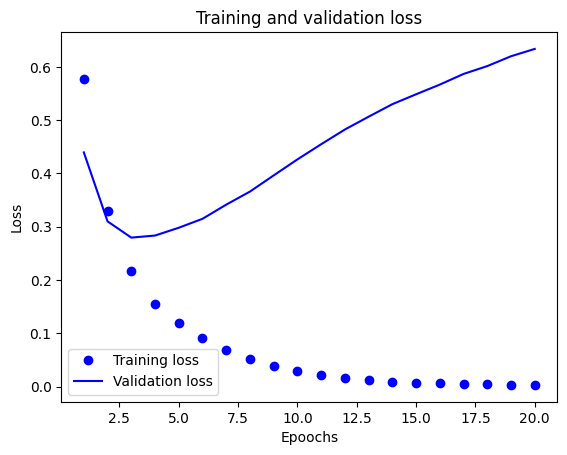

In [144]:
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [145]:
plt.clf()

<Figure size 640x480 with 0 Axes>

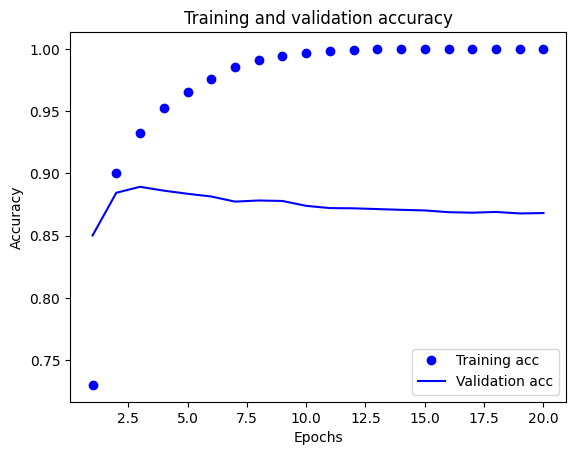

In [146]:
acc=history_dict["accuracy"]
val_acc=history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [147]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 3, batch_size=512)
results = model.evaluate (x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 10ms/step - loss: 0.4794 - accuracy: 0.8125
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.2457 - accuracy: 0.9126
Epoch 3/3
782/782 [==============================] - 1s 1ms/step - loss: 0.2917 - accuracy: 0.8835


In [148]:
results

[0.2916654348373413, 0.8835200071334839]

In [149]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.25743225],
       [0.9998191 ],
       [0.74659497],
       ...,
       [0.12654175],
       [0.09091531],
       [0.45268485]], dtype=float32)

In [150]:
prediction=model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

[[11269  1231]
 [ 1681 10819]]
0.88352
0.8978423236514523
0.8813849287169043
0.86552


# 1. Model 1-1 (Layers:1, Units:16, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 6)

In [152]:
set_random_seed(1)

model1_1 = keras.Sequential ([
    layers.Dense (16, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

In [153]:
model1_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [154]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [155]:
history1_1 = model1_1.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5679 - accuracy: 0.7780 - val_loss: 0.4414 - val_accuracy: 0.8519
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3560 - accuracy: 0.8891 - val_loss: 0.3412 - val_accuracy: 0.8773
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2667 - accuracy: 0.9172 - val_loss: 0.3020 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2166 - accuracy: 0.9349 - val_loss: 0.2850 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1832 - accuracy: 0.9451 - val_loss: 0.2792 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1575 - accuracy: 0.9546 - val_loss: 0.2782 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1367 - accuracy: 0.9619 - val_loss: 0.2803 - val_accuracy: 0.8878
Epoch 8/20
30

In [156]:
history_dict1_1 = history1_1.history
history_dict1_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

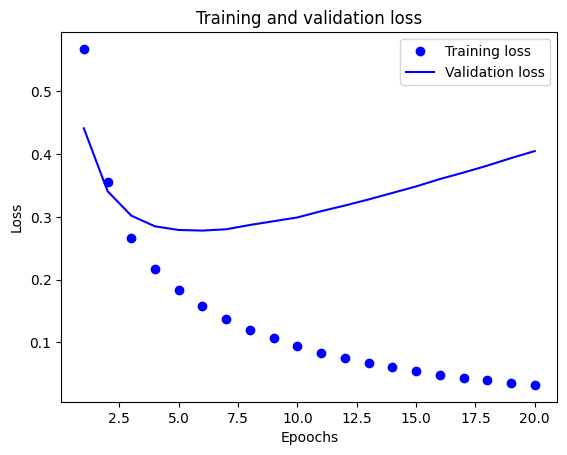

In [157]:
history_dict1_1=history1_1.history
loss_values1_1=history_dict1_1["loss"]
val_loss_values1_1=history_dict1_1["val_loss"]
epochs = range(1, len(loss_values1_1) + 1)
plt.plot(epochs, loss_values1_1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1_1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [158]:
plt.clf()

<Figure size 640x480 with 0 Axes>

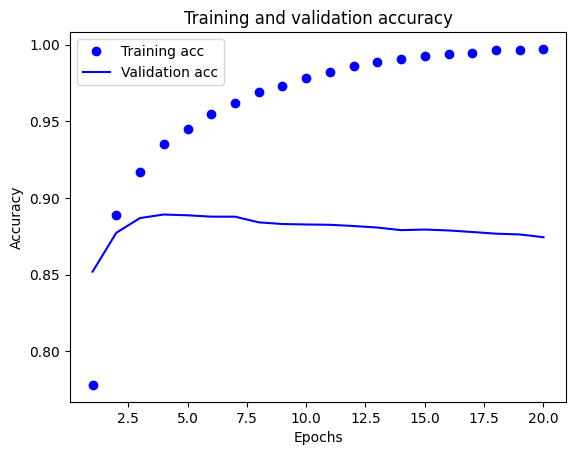

In [159]:
acc=history_dict1_1["accuracy"]
val_acc1_1=history_dict1_1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc1_1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [160]:
model1_1 = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model1_1.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"])

model1_1.fit(x_train, y_train, epochs = 6, batch_size=512)
results1_1 = model1_1.evaluate (x_test, y_test)

Epoch 1/6
49/49 [==============================] - 1s 10ms/step - loss: 0.4602 - accuracy: 0.8163
Epoch 2/6
49/49 [==============================] - 1s 11ms/step - loss: 0.2651 - accuracy: 0.9094
Epoch 3/6
49/49 [==============================] - 1s 10ms/step - loss: 0.2093 - accuracy: 0.9298
Epoch 4/6
49/49 [==============================] - 1s 11ms/step - loss: 0.1769 - accuracy: 0.9411
Epoch 5/6
49/49 [==============================] - 1s 10ms/step - loss: 0.1539 - accuracy: 0.9495
Epoch 6/6
782/782 [==============================] - 1s 1ms/step - loss: 0.3036 - accuracy: 0.8799


In [161]:
results1_1

[0.30364981293678284, 0.8798800110816956]

In [162]:
model1_1.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.19932748],
       [0.9999219 ],
       [0.6575631 ],
       ...,
       [0.12776995],
       [0.08407292],
       [0.75338787]], dtype=float32)

In [163]:
prediction1_1=model1_1.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction1_1 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 1s 1ms/step
[[10984  1516]
 [ 1487 11013]]
0.87988
0.8790007183334664
0.8800191777538057
0.88104


# 1. Model 1-2 (Hidden layers:3, Units:16, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 3)

In [164]:
set_random_seed(1)

model1_2 = keras.Sequential ([
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model1_2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history1_2 = model1_2.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5703 - accuracy: 0.7471 - val_loss: 0.4000 - val_accuracy: 0.8626
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2851 - accuracy: 0.9066 - val_loss: 0.2840 - val_accuracy: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1757 - accuracy: 0.9408 - val_loss: 0.2826 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1174 - accuracy: 0.9644 - val_loss: 0.3088 - val_accuracy: 0.8827
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0780 - accuracy: 0.9795 - val_loss: 0.3501 - val_accuracy: 0.8781
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0513 - accuracy: 0.9889 - val_loss: 0.4111 - val_accuracy: 0.8751
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0317 - accuracy: 0.9951 - val_loss: 0.4500 - val_accuracy: 0.8727
Epoch 8/20
30

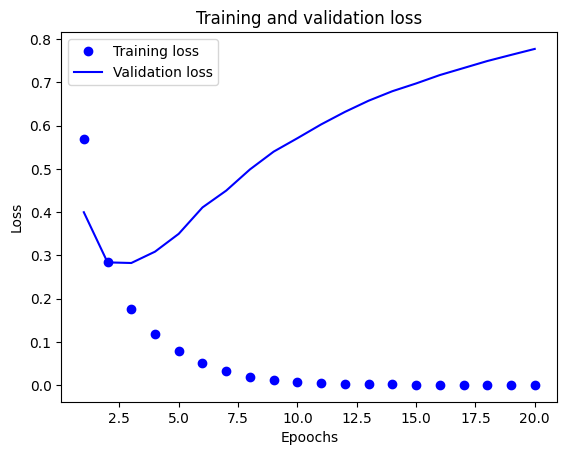

In [165]:
history_dict1_2 = history1_2.history

history_dict1_2=history1_2.history
loss_values1_2=history_dict1_2["loss"]
val_loss_values1_2=history_dict1_2["val_loss"]
epochs = range(1, len(loss_values1_2) + 1)
plt.plot(epochs, loss_values1_2, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1_2, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

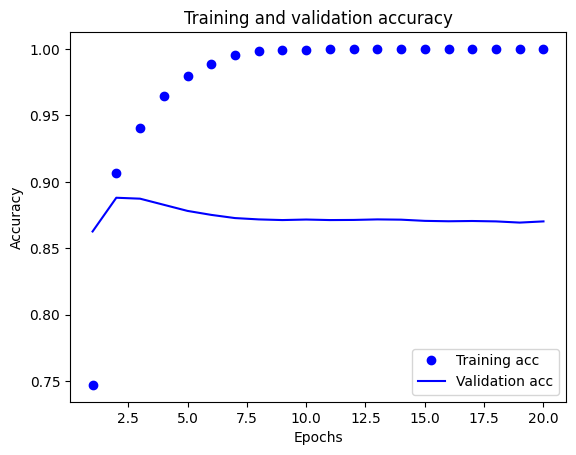

In [166]:
plt.clf()

acc=history_dict1_2["accuracy"]
val_acc1_2=history_dict1_2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc1_2, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [167]:
model1_2 = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense(1, activation = "sigmoid")
])

model1_2.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"])

model1_2.fit(x_train, y_train, epochs = 3, batch_size=512)
results1_2 = model1_2.evaluate (x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 12ms/step - loss: 0.4981 - accuracy: 0.8036
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.2339 - accuracy: 0.9141
Epoch 3/3
782/782 [==============================] - 12s 2ms/step - loss: 0.3103 - accuracy: 0.8796


In [168]:
results1_2

[0.3102581799030304, 0.8795999884605408]

In [169]:
model1_2.predict(x_test)

782/782 [==============================] - 10s 4ms/step


array([[0.13405727],
       [0.99973863],
       [0.5567784 ],
       ...,
       [0.09483112],
       [0.05227594],
       [0.63046294]], dtype=float32)

In [170]:
prediction1_2=model1_2.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction1_2 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 1s 1ms/step
[[11132  1368]
 [ 1642 10858]]
0.8796
0.8881073122852936
0.8782657930922915
0.86864


# 1. Model 1-3 (Hidden layers:4, Units:16, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 4)

In [171]:
set_random_seed(1)

model1_3 = keras.Sequential ([
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model1_3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history1_3 = model1_3.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.6372 - accuracy: 0.6863 - val_loss: 0.5235 - val_accuracy: 0.8377
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3759 - accuracy: 0.8891 - val_loss: 0.3041 - val_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2000 - accuracy: 0.9329 - val_loss: 0.2814 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1284 - accuracy: 0.9594 - val_loss: 0.3061 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0832 - accuracy: 0.9782 - val_loss: 0.3491 - val_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0540 - accuracy: 0.9885 - val_loss: 0.4176 - val_accuracy: 0.8759
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0322 - accuracy: 0.9949 - val_loss: 0.4511 - val_accuracy: 0.8750
Epoch 8/20
30

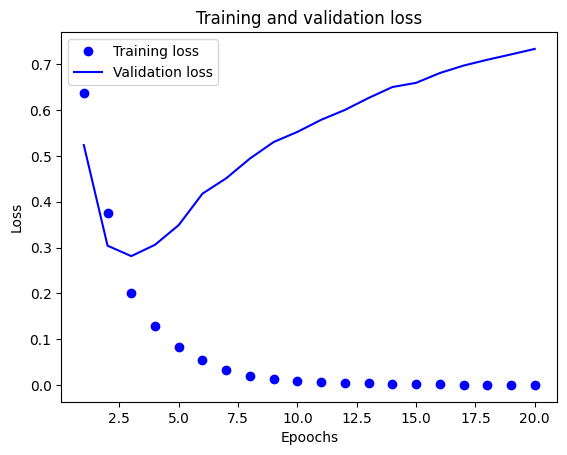

In [172]:
history_dict1_3 = history1_3.history

history_dict1_3=history1_3.history
loss_values1_3=history_dict1_3["loss"]
val_loss_values1_3=history_dict1_3["val_loss"]
epochs = range(1, len(loss_values1_3) + 1)
plt.plot(epochs, loss_values1_3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1_3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

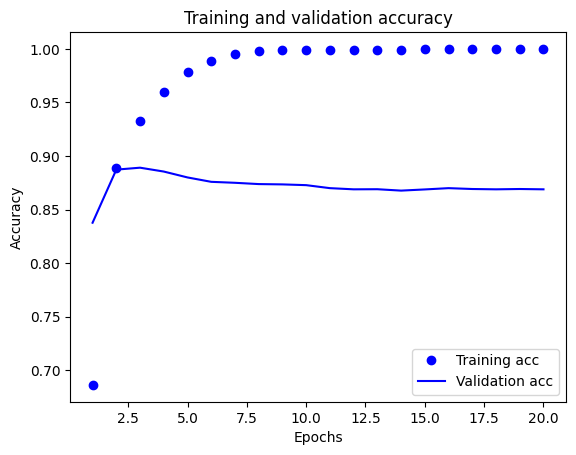

In [173]:
plt.clf()

acc=history_dict1_3["accuracy"]
val_acc1_3=history_dict1_3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc1_3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [174]:
model1_3 = keras.Sequential([
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model1_3.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"])

model1_3.fit(x_train, y_train, epochs = 3, batch_size=512)
results1_3 = model1_3.evaluate (x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 11ms/step - loss: 0.5442 - accuracy: 0.7400
Epoch 2/3
49/49 [==============================] - 1s 10ms/step - loss: 0.2408 - accuracy: 0.9138
Epoch 3/3
782/782 [==============================] - 7s 1ms/step - loss: 0.3195 - accuracy: 0.8782


In [175]:
results1_3

[0.3195359706878662, 0.8781999945640564]

In [176]:
model1_3.predict(x_test)

782/782 [==============================] - 9s 3ms/step


array([[0.14421484],
       [0.9983755 ],
       [0.6324244 ],
       ...,
       [0.08767597],
       [0.03969065],
       [0.58662796]], dtype=float32)

In [177]:
prediction1_3=model1_3.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction1_3 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 2s 3ms/step
[[11177  1323]
 [ 1722 10778]]
0.8782
0.8906701925460706
0.8762245437177351
0.86224


# 2. Model 2-1 (Hidden layers:2, Units:4, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 9)

In [178]:
set_random_seed(1)

model2_1 = keras.Sequential ([
    layers.Dense (4, activation="relu"),
    layers.Dense (4, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model2_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history2_1 = model2_1.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 16s 159ms/step - loss: 0.6536 - accuracy: 0.5619 - val_loss: 0.6087 - val_accuracy: 0.6626
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5617 - accuracy: 0.7335 - val_loss: 0.5472 - val_accuracy: 0.7655
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5017 - accuracy: 0.8269 - val_loss: 0.5101 - val_accuracy: 0.8139
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4594 - accuracy: 0.8725 - val_loss: 0.4858 - val_accuracy: 0.8298
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4259 - accuracy: 0.9013 - val_loss: 0.4642 - val_accuracy: 0.8548
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3966 - accuracy: 0.9228 - val_loss: 0.4491 - val_accuracy: 0.8614
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3700 - accuracy: 0.9393 - val_loss: 0.4403 - val_accuracy: 0.8587
Epoch 8/20


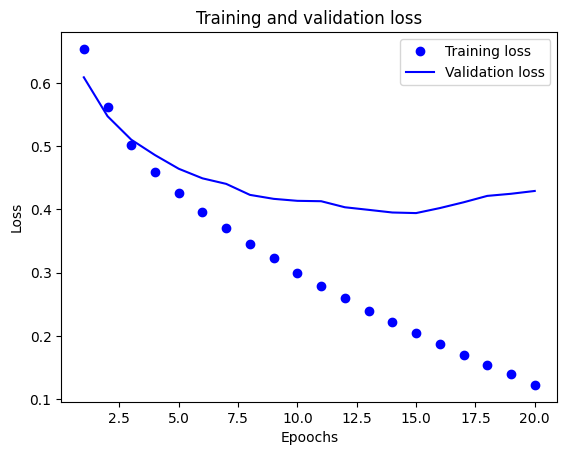

In [179]:
history_dict2_1 = history2_1.history

history_dict2_1=history2_1.history
loss_values2_1=history_dict2_1["loss"]
val_loss_values2_1=history_dict2_1["val_loss"]
epochs = range(1, len(loss_values2_1) + 1)
plt.plot(epochs, loss_values2_1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values2_1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

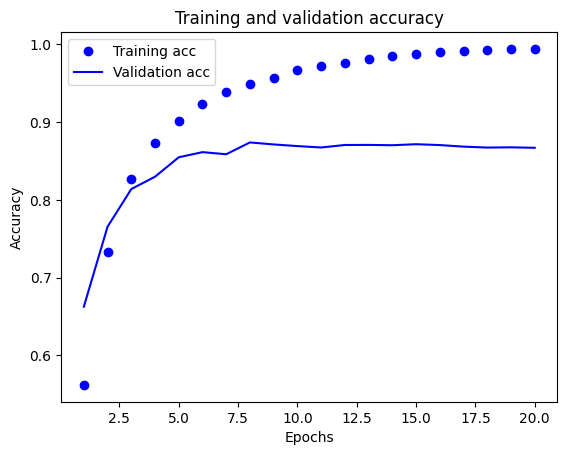

In [180]:
plt.clf()

acc=history_dict2_1["accuracy"]
val_acc2_1=history_dict2_1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc2_1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [181]:
model2_1 = keras.Sequential([
    layers.Dense(4, activation = "relu"),
    layers.Dense(4, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])
model2_1.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"])

model2_1.fit(x_train, y_train, epochs = 15, batch_size=512)
results2_1 = model1_1.evaluate (x_test, y_test)

Epoch 1/15
49/49 [==============================] - 1s 10ms/step - loss: 0.6067 - accuracy: 0.6698
Epoch 2/15
49/49 [==============================] - 0s 10ms/step - loss: 0.4913 - accuracy: 0.8361
Epoch 3/15
49/49 [==============================] - 0s 10ms/step - loss: 0.4405 - accuracy: 0.8934
Epoch 4/15
49/49 [==============================] - 0s 10ms/step - loss: 0.4051 - accuracy: 0.9183
Epoch 5/15
49/49 [==============================] - 0s 10ms/step - loss: 0.3768 - accuracy: 0.9345
Epoch 6/15
49/49 [==============================] - 0s 10ms/step - loss: 0.3526 - accuracy: 0.9472
Epoch 7/15
49/49 [==============================] - 0s 10ms/step - loss: 0.3311 - accuracy: 0.9571
Epoch 8/15
49/49 [==============================] - 0s 10ms/step - loss: 0.3122 - accuracy: 0.9648
Epoch 9/15
49/49 [==============================] - 0s 10ms/step - loss: 0.2951 - accuracy: 0.9706
Epoch 10/15
49/49 [==============================] - 0s 10ms/step - loss: 0.2795 - accuracy: 0.9757
Epoch 11/

In [182]:
results2_1

[0.30364981293678284, 0.8798800110816956]

In [183]:
model2_1.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.31791347],
       [1.        ],
       [0.9998087 ],
       ...,
       [0.48648342],
       [0.31791347],
       [0.8192553 ]], dtype=float32)

In [184]:
prediction2_1=model2_1.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction2_1 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 1s 1ms/step
[[10481  2019]
 [ 1386 11114]]
0.8638
0.8462651336328333
0.8671634221511333
0.88912


# 2. Model 2-2 (Hidden layers:2, Units:8, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 5)

In [185]:
set_random_seed(1)

model2_2 = keras.Sequential ([
    layers.Dense (8, activation="relu"),
    layers.Dense (8, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model2_2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history2_2 = model2_2.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6575 - accuracy: 0.5693 - val_loss: 0.6129 - val_accuracy: 0.6561
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5496 - accuracy: 0.7759 - val_loss: 0.5005 - val_accuracy: 0.8326
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4042 - accuracy: 0.8916 - val_loss: 0.3699 - val_accuracy: 0.8807
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2826 - accuracy: 0.9211 - val_loss: 0.3079 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2153 - accuracy: 0.9355 - val_loss: 0.2841 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1717 - accuracy: 0.9505 - val_loss: 0.2780 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1400 - accuracy: 0.9612 - val_loss: 0.2818 - val_accuracy: 0.8878
Epoch 8/20
30

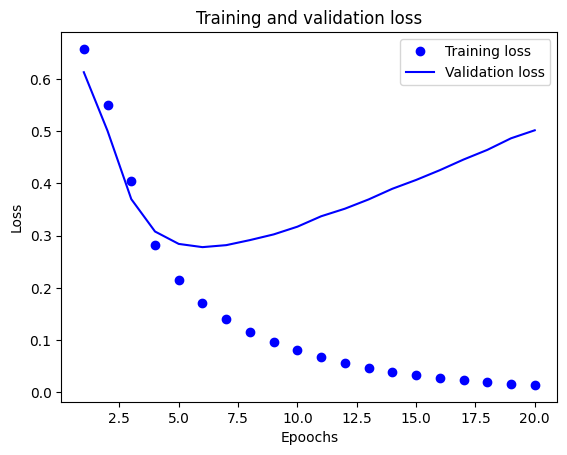

In [186]:
history_dict2_2 = history2_2.history

history_dict2_2=history2_2.history
loss_values2_2=history_dict2_2["loss"]
val_loss_values2_2=history_dict2_2["val_loss"]
epochs = range(1, len(loss_values2_2) + 1)
plt.plot(epochs, loss_values2_2, "bo", label="Training loss")
plt.plot(epochs, val_loss_values2_2, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

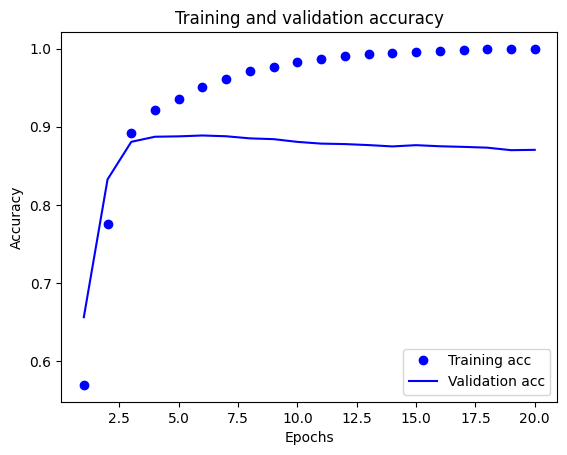

In [187]:
plt.clf()

acc=history_dict2_2["accuracy"]
val_acc2_2=history_dict2_2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc2_2, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [188]:
model2_2 = keras.Sequential([
    layers.Dense (8, activation="relu"),
    layers.Dense (8, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model2_2.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"])

model2_2.fit(x_train, y_train, epochs = 6, batch_size=512)
results2_2 = model2_2.evaluate (x_test, y_test)

Epoch 1/6
49/49 [==============================] - 1s 11ms/step - loss: 0.5437 - accuracy: 0.7898
Epoch 2/6
49/49 [==============================] - 1s 11ms/step - loss: 0.2994 - accuracy: 0.8982
Epoch 3/6
49/49 [==============================] - 1s 11ms/step - loss: 0.2158 - accuracy: 0.9250
Epoch 4/6
49/49 [==============================] - 1s 11ms/step - loss: 0.1749 - accuracy: 0.9398
Epoch 5/6
49/49 [==============================] - 1s 11ms/step - loss: 0.1472 - accuracy: 0.9508
Epoch 6/6
782/782 [==============================] - 1s 1ms/step - loss: 0.3183 - accuracy: 0.8791


In [189]:
results2_2

[0.3182969391345978, 0.8790799975395203]

In [190]:
model2_2.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.18630467],
       [0.9999465 ],
       [0.7225737 ],
       ...,
       [0.11918665],
       [0.07058854],
       [0.7718271 ]], dtype=float32)

In [191]:
prediction2_2=model2_2.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction2_2 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 1s 1ms/step
[[10966  1534]
 [ 1489 11011]]
0.87908
0.877720207253886
0.8792972649231383
0.88088


# 2. Model 2-3 (Hidden layers:2, Units:32, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 2)

In [192]:
set_random_seed(1)

model2_3 = keras.Sequential ([
    layers.Dense (32, activation="relu"),
    layers.Dense (32, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model2_3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history2_3 = model2_3.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5361 - accuracy: 0.7792 - val_loss: 0.3627 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2599 - accuracy: 0.9077 - val_loss: 0.2782 - val_accuracy: 0.8893
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1646 - accuracy: 0.9427 - val_loss: 0.2848 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1122 - accuracy: 0.9649 - val_loss: 0.3134 - val_accuracy: 0.8819
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0769 - accuracy: 0.9789 - val_loss: 0.3531 - val_accuracy: 0.8774
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0526 - accuracy: 0.9886 - val_loss: 0.4102 - val_accuracy: 0.8751
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0343 - accuracy: 0.9943 - val_loss: 0.4448 - val_accuracy: 0.8715
Epoch 8/20
30

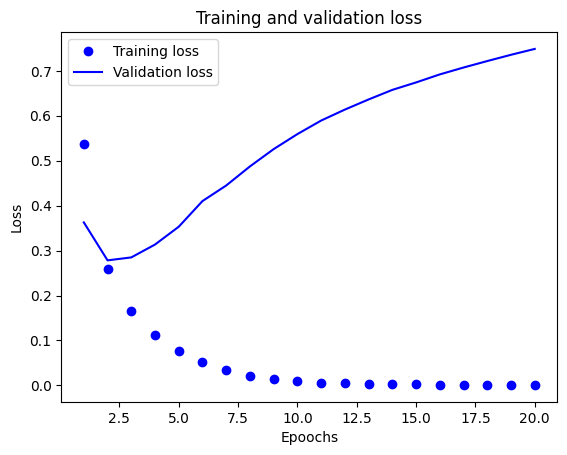

In [193]:
history_dict2_3 = history2_3.history

history_dict2_3=history2_3.history
loss_values2_3=history_dict2_3["loss"]
val_loss_values2_3=history_dict2_3["val_loss"]
epochs = range(1, len(loss_values2_3) + 1)
plt.plot(epochs, loss_values2_3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values2_3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

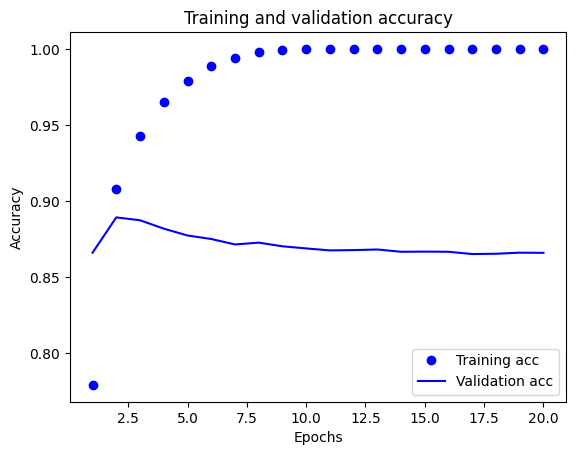

In [194]:
plt.clf()

acc=history_dict2_3["accuracy"]
val_acc2_3=history_dict2_3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc2_3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [195]:
model2_3 = keras.Sequential([
    layers.Dense (32, activation="relu"),
    layers.Dense (32, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model2_3.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"])

model2_3.fit(x_train, y_train, epochs = 2, batch_size=512)
results2_3 = model2_3.evaluate (x_test, y_test)

Epoch 1/2
49/49 [==============================] - 1s 11ms/step - loss: 0.4313 - accuracy: 0.8249
Epoch 2/2
782/782 [==============================] - 1s 2ms/step - loss: 0.2893 - accuracy: 0.8843


In [196]:
results2_3

[0.2893281877040863, 0.8843200206756592]

In [197]:
model2_3.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.24316378],
       [0.9997291 ],
       [0.79761714],
       ...,
       [0.11018952],
       [0.08717441],
       [0.69053745]], dtype=float32)

In [198]:
prediction2_3=model2_3.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction2_3 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 1s 2ms/step
[[11115  1385]
 [ 1507 10993]]
0.88432
0.8881079334302795
0.8837527132406142
0.87944


# 2. Model 2-4 (Hidden layers:2, Units:64, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 2)

In [199]:
set_random_seed(1)

model2_4 = keras.Sequential ([
    layers.Dense (64, activation="relu"),
    layers.Dense (64, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model2_4.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history2_4 = model2_4.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 35ms/step - loss: 0.4672 - accuracy: 0.7980 - val_loss: 0.2887 - val_accuracy: 0.8866
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1983 - accuracy: 0.9251 - val_loss: 0.2837 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1200 - accuracy: 0.9597 - val_loss: 0.3202 - val_accuracy: 0.8832
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0750 - accuracy: 0.9778 - val_loss: 0.3679 - val_accuracy: 0.8794
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0437 - accuracy: 0.9898 - val_loss: 0.4279 - val_accuracy: 0.8749
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0253 - accuracy: 0.9963 - val_loss: 0.5133 - val_accuracy: 0.8701
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0139 - accuracy: 0.9988 - val_loss: 0.5473 - val_accuracy: 0.8693
Epoch 8/20
30

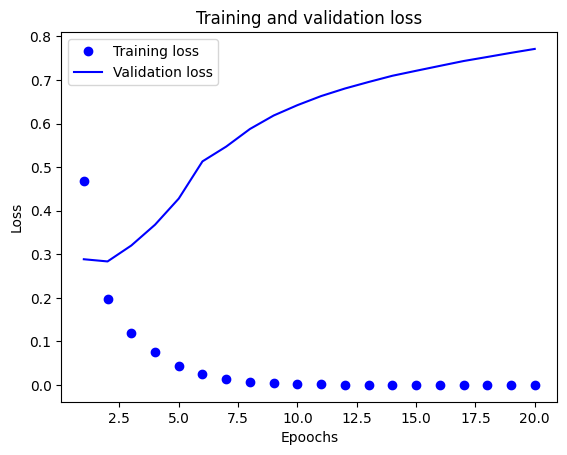

In [200]:
history_dict2_4 = history2_4.history

history_dict2_4=history2_4.history
loss_values2_4=history_dict2_4["loss"]
val_loss_values2_4=history_dict2_4["val_loss"]
epochs = range(1, len(loss_values2_4) + 1)
plt.plot(epochs, loss_values2_4, "bo", label="Training loss")
plt.plot(epochs, val_loss_values2_4, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

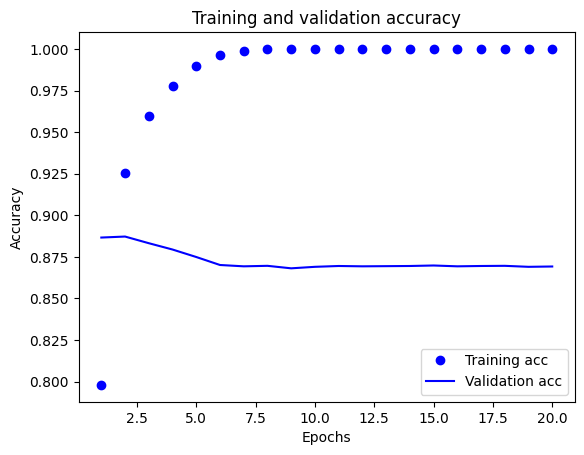

In [201]:
plt.clf()

acc=history_dict2_4["accuracy"]
val_acc2_4=history_dict2_4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc2_4, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [202]:
model2_4 = keras.Sequential([
    layers.Dense (64, activation="relu"),
    layers.Dense (64, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model2_4.compile(optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"])

model2_4.fit(x_train, y_train, epochs = 2, batch_size=512)
results2_4 = model2_4.evaluate (x_test, y_test)

Epoch 1/2
49/49 [==============================] - 9s 18ms/step - loss: 0.3880 - accuracy: 0.8411
Epoch 2/2
782/782 [==============================] - 11s 2ms/step - loss: 0.3078 - accuracy: 0.8792


In [203]:
results2_4

[0.3078042268753052, 0.8792399764060974]

In [204]:
model2_4.predict(x_test)

782/782 [==============================] - 13s 2ms/step


array([[0.24210288],
       [0.99992794],
       [0.87127197],
       ...,
       [0.14684357],
       [0.07821715],
       [0.7797035 ]], dtype=float32)

In [205]:
prediction2_4=model2_4.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction2_4 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 17s 13ms/step
[[10849  1651]
 [ 1368 11132]]
0.87924
0.8708440898067746
0.8805917019341059
0.89056


# 3. Model 3 (Hidden layers:2, Units:16, Loss function: mean_squared_error, Activation function: relu, Final model epochs: 4)

In [206]:
set_random_seed(1)

model3 = keras.Sequential ([
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model3.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

history3 = model3.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 5s 36ms/step - loss: 0.1959 - accuracy: 0.7362 - val_loss: 0.1368 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0966 - accuracy: 0.9057 - val_loss: 0.0941 - val_accuracy: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0612 - accuracy: 0.9366 - val_loss: 0.0853 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0438 - accuracy: 0.9571 - val_loss: 0.0846 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0331 - accuracy: 0.9700 - val_loss: 0.0862 - val_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0246 - accuracy: 0.9799 - val_loss: 0.0866 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0184 - accuracy: 0.9871 - val_loss: 0.0899 - val_accuracy: 0.8777
Epoch 8/20
30

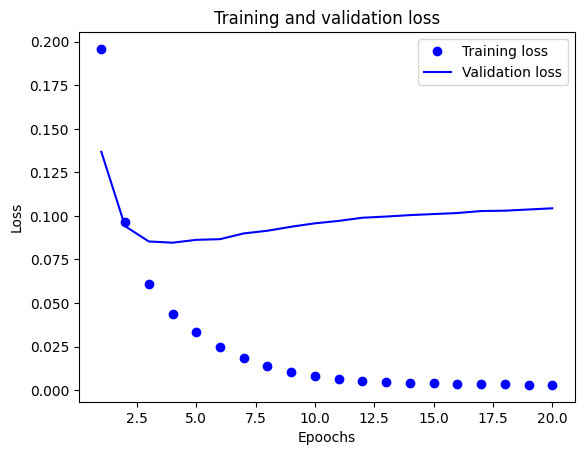

In [207]:
history_dict3 = history3.history

history_dict3=history3.history
loss_values3=history_dict3["loss"]
val_loss_values3=history_dict3["val_loss"]
epochs = range(1, len(loss_values3) + 1)
plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

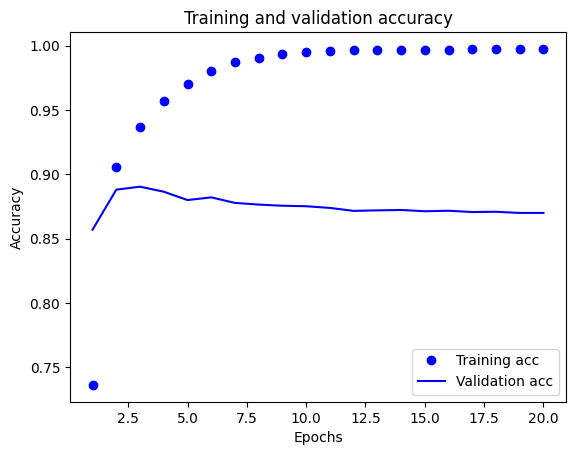

In [208]:
plt.clf()

acc=history_dict3["accuracy"]
val_acc3=history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [209]:
model3 = keras.Sequential([
    layers.Dense (16, activation="relu"),
    layers.Dense (16, activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model3.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

model3.fit(x_train, y_train, epochs = 4, batch_size=512)
results3 = model3.evaluate (x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.1567 - accuracy: 0.8126
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.0719 - accuracy: 0.9153
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0515 - accuracy: 0.9406
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0885 - accuracy: 0.8804


In [210]:
results3

[0.088542141020298, 0.8804399967193604]

In [211]:
model3.predict(x_test)

782/782 [==============================] - 7s 8ms/step


array([[0.1782553 ],
       [0.9997299 ],
       [0.83902645],
       ...,
       [0.22983612],
       [0.13154022],
       [0.48966503]], dtype=float32)

In [212]:
prediction3=model3.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction3 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 1s 1ms/step
[[10917  1583]
 [ 1406 11094]]
0.88044
0.8751281849017907
0.8812805338205504
0.88752


# 4. Model 4 (Hidden layers:2, Units:16, Loss function: binary_crossentropy, Activation function: tanh, Final model epochs: 3)

In [213]:
set_random_seed(1)

model4 = keras.Sequential ([
    layers.Dense (16, activation="tanh"),
    layers.Dense (16, activation="tanh"),
    layers.Dense (1, activation="sigmoid")
])

model4.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history4 = model4.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5099 - accuracy: 0.7861 - val_loss: 0.3762 - val_accuracy: 0.8626
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2797 - accuracy: 0.9078 - val_loss: 0.2905 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1901 - accuracy: 0.9399 - val_loss: 0.2733 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1383 - accuracy: 0.9603 - val_loss: 0.2819 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1057 - accuracy: 0.9721 - val_loss: 0.2970 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0770 - accuracy: 0.9833 - val_loss: 0.3188 - val_accuracy: 0.8793
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0561 - accuracy: 0.9896 - val_loss: 0.3464 - val_accuracy: 0.8757
Epoch 8/20
30

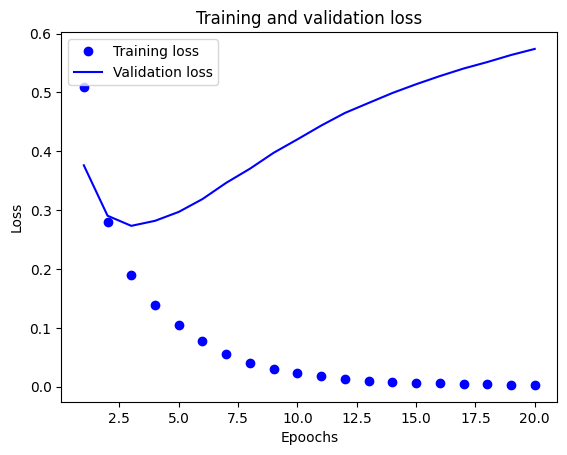

In [214]:
history_dict4 = history4.history

history_dict4=history4.history
loss_values4=history_dict4["loss"]
val_loss_values4=history_dict4["val_loss"]
epochs = range(1, len(loss_values4) + 1)
plt.plot(epochs, loss_values4, "bo", label="Training loss")
plt.plot(epochs, val_loss_values4, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

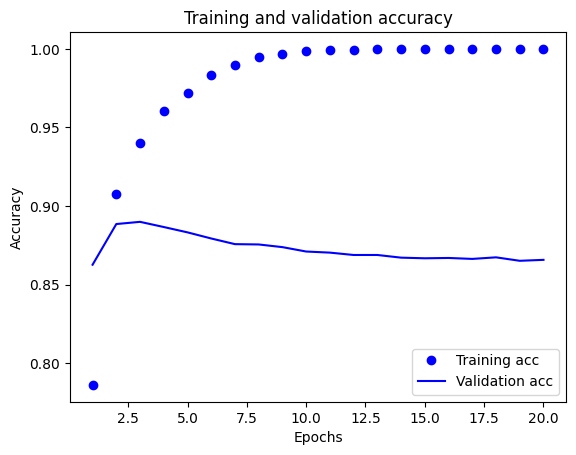

In [215]:
plt.clf()

acc=history_dict4["accuracy"]
val_acc4=history_dict4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc4, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [216]:
model4 = keras.Sequential([
    layers.Dense (16, activation="tanh"),
    layers.Dense (16, activation="tanh"),
    layers.Dense (1, activation="sigmoid")
])

model4.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model4.fit(x_train, y_train, epochs = 3, batch_size=512)
results4 = model4.evaluate (x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 13ms/step - loss: 0.4476 - accuracy: 0.8226
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.2343 - accuracy: 0.9153
Epoch 3/3
782/782 [==============================] - 6s 8ms/step - loss: 0.2946 - accuracy: 0.8805


In [217]:
results4

[0.2946106195449829, 0.8805199861526489]

In [218]:
model4.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.12853202],
       [0.9937112 ],
       [0.61530757],
       ...,
       [0.12184777],
       [0.07146339],
       [0.5734193 ]], dtype=float32)

In [219]:
prediction4=model4.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction4 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 5s 6ms/step
[[11241  1259]
 [ 1728 10772]]
0.88052
0.8953536696866429
0.8782357017651136
0.86176


# 5. Model 5-1, Technique - regularization L2 (Hidden layers:2, Units:16, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 5)

In [220]:
set_random_seed(1)
from keras import regularizers
model5_1 = keras.Sequential ([
    layers.Dense (16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense (16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model5_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history5_1 = model5_1.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 16s 89ms/step - loss: 0.6466 - accuracy: 0.7331 - val_loss: 0.5037 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4073 - accuracy: 0.8963 - val_loss: 0.3905 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3161 - accuracy: 0.9236 - val_loss: 0.3670 - val_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2743 - accuracy: 0.9401 - val_loss: 0.3653 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2519 - accuracy: 0.9465 - val_loss: 0.3706 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2355 - accuracy: 0.9539 - val_loss: 0.3756 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2219 - accuracy: 0.9593 - val_loss: 0.3799 - val_accuracy: 0.8807
Epoch 8/20
3

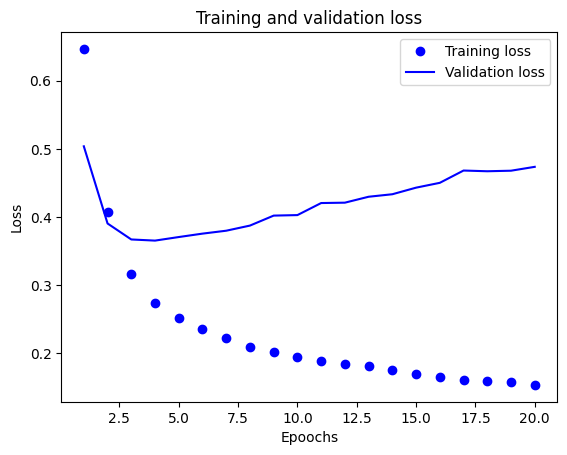

In [221]:
history_dict5_1 = history5_1.history

history_dict5_1=history5_1.history
loss_values5_1=history_dict5_1["loss"]
val_loss_values5_1=history_dict5_1["val_loss"]
epochs = range(1, len(loss_values5_1) + 1)
plt.plot(epochs, loss_values5_1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values5_1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

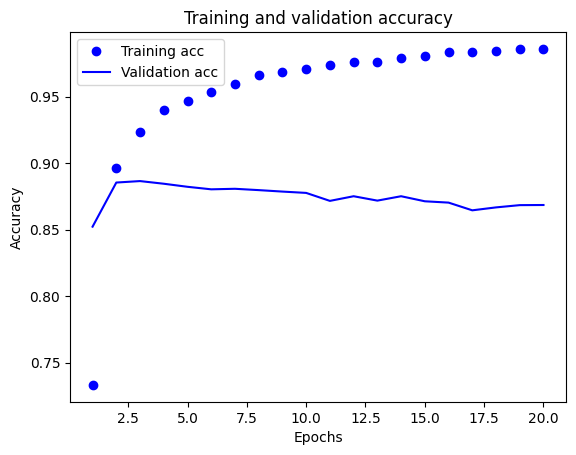

In [222]:
plt.clf()

acc=history_dict5_1["accuracy"]
val_acc5_1=history_dict5_1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc5_1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [223]:
model5_1 = keras.Sequential([
    layers.Dense (16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense (16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model5_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model5_1.fit(x_train, y_train, epochs = 4, batch_size=512)
results5_1 = model5_1.evaluate (x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 13ms/step - loss: 0.5542 - accuracy: 0.8119
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.3349 - accuracy: 0.9058
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2884 - accuracy: 0.9234
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3656 - accuracy: 0.8820


In [224]:
results5_1

[0.3655659854412079, 0.8820000290870667]

In [225]:
model5_1.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.19559759],
       [0.9994683 ],
       [0.6850088 ],
       ...,
       [0.10985907],
       [0.09303881],
       [0.60421425]], dtype=float32)

In [226]:
prediction5_1=model5_1.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction5_1 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 2s 2ms/step
[[11072  1428]
 [ 1522 10978]]
0.882
0.8848944059326133
0.8815546454669558
0.87824


# 5. Model 5-2, Technique - dropout (Hidden layers:2, Units:16, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 7)

In [227]:
set_random_seed(1)

model5_2 = keras.Sequential ([
    layers.Dense (16, activation="relu"),
    layers.Dropout (0.5),
    layers.Dense (16, activation="relu"),
    layers.Dropout (0.5),
    layers.Dense (1, activation="sigmoid")
])

model5_2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history5_2 = model5_2.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 42ms/step - loss: 0.6529 - accuracy: 0.5979 - val_loss: 0.5585 - val_accuracy: 0.8231
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5437 - accuracy: 0.7413 - val_loss: 0.4475 - val_accuracy: 0.8627
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4471 - accuracy: 0.8246 - val_loss: 0.3682 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3706 - accuracy: 0.8657 - val_loss: 0.3126 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3139 - accuracy: 0.8932 - val_loss: 0.2867 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2678 - accuracy: 0.9131 - val_loss: 0.2757 - val_accuracy: 0.8907
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2291 - accuracy: 0.9247 - val_loss: 0.2784 - val_accuracy: 0.8907
Epoch 8/20
30

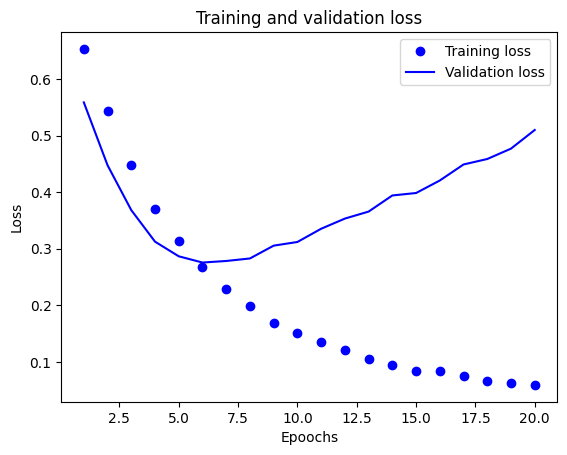

In [228]:
history_dict5_2 = history5_2.history

history_dict5_2=history5_2.history
loss_values5_2=history_dict5_2["loss"]
val_loss_values5_2=history_dict5_2["val_loss"]
epochs = range(1, len(loss_values5_2) + 1)
plt.plot(epochs, loss_values5_2, "bo", label="Training loss")
plt.plot(epochs, val_loss_values5_2, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

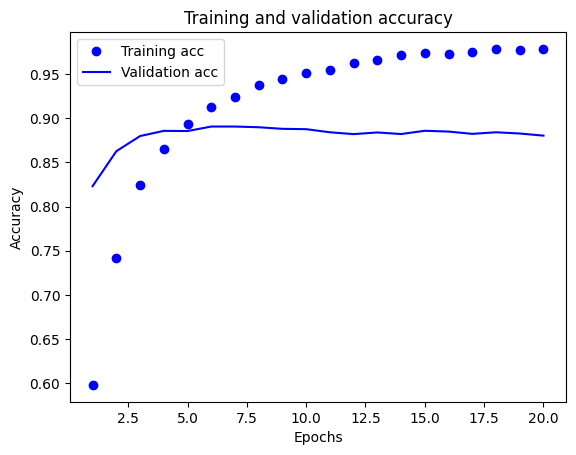

In [229]:
plt.clf()

acc=history_dict5_2["accuracy"]
val_acc5_2=history_dict5_2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc5_2, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [230]:
model5_2 = keras.Sequential([
    layers.Dense (16, activation="relu"),
    layers.Dropout (0.5),
    layers.Dense (16, activation="relu"),
    layers.Dropout (0.5),
    layers.Dense (1, activation="sigmoid")
])

model5_2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model5_2.fit(x_train, y_train, epochs = 6, batch_size=512)
results5_2 = model5_2.evaluate (x_test, y_test)

Epoch 1/6
49/49 [==============================] - 2s 13ms/step - loss: 0.6387 - accuracy: 0.6220
Epoch 2/6
49/49 [==============================] - 1s 12ms/step - loss: 0.4984 - accuracy: 0.7654
Epoch 3/6
49/49 [==============================] - 1s 12ms/step - loss: 0.3951 - accuracy: 0.8386
Epoch 4/6
49/49 [==============================] - 1s 12ms/step - loss: 0.3260 - accuracy: 0.8748
Epoch 5/6
49/49 [==============================] - 1s 13ms/step - loss: 0.2704 - accuracy: 0.9006
Epoch 6/6
782/782 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.8874


In [231]:
results5_2

[0.2822820246219635, 0.887440025806427]

In [232]:
model5_2.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.11716298],
       [0.99983597],
       [0.9795613 ],
       ...,
       [0.08027302],
       [0.08629934],
       [0.6289325 ]], dtype=float32)

In [233]:
prediction5_2=model5_2.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction5_2 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 1s 1ms/step
[[10964  1536]
 [ 1278 11222]]
0.88744
0.879604953754507
0.8885897537413889
0.89776


# 5. Model 5-3, Technique - regularization L1 (Hidden layers:2, Units:16, Loss function: binary_crossentropy, Activation function: relu, Final model epochs: 14)

In [234]:
set_random_seed(1)

model5_3 = keras.Sequential ([
    layers.Dense (16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    layers.Dense (16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model5_3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history5_3 = model5_3.fit (partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 1.3958 - accuracy: 0.6977 - val_loss: 0.7954 - val_accuracy: 0.8157
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6645 - accuracy: 0.8489 - val_loss: 0.5912 - val_accuracy: 0.8512
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5550 - accuracy: 0.8635 - val_loss: 0.5442 - val_accuracy: 0.8554
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5181 - accuracy: 0.8695 - val_loss: 0.5260 - val_accuracy: 0.8583
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5014 - accuracy: 0.8718 - val_loss: 0.5086 - val_accuracy: 0.8668
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4894 - accuracy: 0.8739 - val_loss: 0.5083 - val_accuracy: 0.8638
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4791 - accuracy: 0.8789 - val_loss: 0.4917 - val_accuracy: 0.8727
Epoch 8/20
30

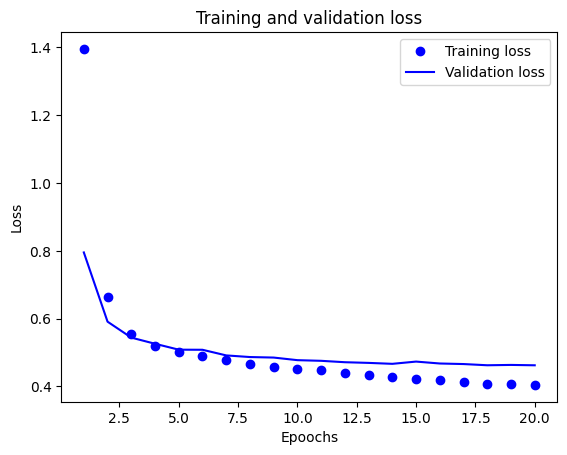

In [235]:
history_dict5_3 = history5_3.history

history_dict5_3=history5_3.history
loss_values5_3=history_dict5_3["loss"]
val_loss_values5_3=history_dict5_3["val_loss"]
epochs = range(1, len(loss_values5_3) + 1)
plt.plot(epochs, loss_values5_3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values5_3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epoochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

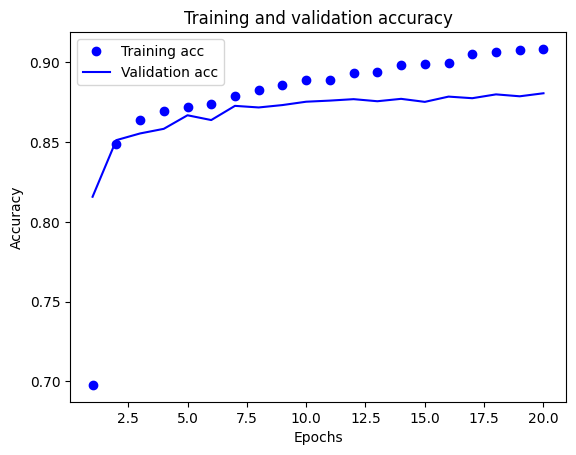

In [236]:
plt.clf()

acc=history_dict5_3["accuracy"]
val_acc5_3=history_dict5_3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc5_3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [237]:
model5_3 = keras.Sequential([
    layers.Dense (16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    layers.Dense (16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    layers.Dense (1, activation="sigmoid")
])

model5_3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model5_3.fit(x_train, y_train, epochs = 14, batch_size=512)
results5_3 = model5_3.evaluate (x_test, y_test)

Epoch 1/14
49/49 [==============================] - 1s 12ms/step - loss: 1.1085 - accuracy: 0.7741
Epoch 2/14
49/49 [==============================] - 1s 12ms/step - loss: 0.5580 - accuracy: 0.8568
Epoch 3/14
49/49 [==============================] - 1s 12ms/step - loss: 0.5158 - accuracy: 0.8647
Epoch 4/14
49/49 [==============================] - 1s 13ms/step - loss: 0.5041 - accuracy: 0.8698
Epoch 5/14
49/49 [==============================] - 1s 12ms/step - loss: 0.4915 - accuracy: 0.8730
Epoch 6/14
49/49 [==============================] - 1s 12ms/step - loss: 0.4801 - accuracy: 0.8761
Epoch 7/14
49/49 [==============================] - 1s 12ms/step - loss: 0.4736 - accuracy: 0.8798
Epoch 8/14
49/49 [==============================] - 1s 12ms/step - loss: 0.4662 - accuracy: 0.8804
Epoch 9/14
49/49 [==============================] - 1s 11ms/step - loss: 0.4578 - accuracy: 0.8848
Epoch 10/14
49/49 [==============================] - 1s 12ms/step - loss: 0.4567 - accuracy: 0.8862
Epoch 11/

In [238]:
results5_3

[0.45948952436447144, 0.8795199990272522]

In [239]:
model5_3.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.17069107],
       [0.9935409 ],
       [0.6288209 ],
       ...,
       [0.07730321],
       [0.07227676],
       [0.3753525 ]], dtype=float32)

In [240]:
prediction5_3=model5_3.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

T= 0.5
y_pred_bool = prediction5_3 >= T

print(confusion_matrix(y_test, y_pred_bool))
print(accuracy_score(y_test, y_pred_bool))
print(precision_score(y_test, y_pred_bool))
print(f1_score(y_test, y_pred_bool))
print(recall_score(y_test, y_pred_bool))

782/782 [==============================] - 1s 1ms/step
[[11225  1275]
 [ 1737 10763]]
0.87952
0.8940853962452234
0.8772516097481458
0.86104
